In [ ]:
from src.autoencoders.IPvae import IdentityPreservingVAE
from src.utils.utils import read_latent_vectors, get_training_and_validation_sets_gray_scale, get_test_set_gray_scale, save_latent_vectors

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\giuli\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
X_train_z, _ = read_latent_vectors('predictions/z_vae_gray_scale_train.pkl')
X_val_z, _ = read_latent_vectors('predictions/z_vae_gray_scale_val.pkl')
X_test_z, _ = read_latent_vectors('predictions/z_vae_gray_scale_test.pkl')

In [3]:
X_train, Y_train, cX_train, X_val, Y_val, cX_val = get_training_and_validation_sets_gray_scale()
X_test, Y_test, cX_test = get_test_set_gray_scale()

In [4]:
X_train_z.shape, X_train.shape, cX_train.shape

((4344, 1280), (4344, 1, 64, 64), (4344, 6))

In [5]:
ipvae = IdentityPreservingVAE(
    input_dim=1280,
    conditions_dim=6,
    latent_dim=1280,
    n_filters=[1],
    kernel_size=[1],
    stride=[1],
    padding=["same", "same"],
    hidden_dims=[960, 640, 960],
    activation='relu',
    learning_rate=0.0005,
    dropout=0.3,
    alpha=0.2, # LeakyReLU alpha
    loss_function='mse',
    patience=10,
    metrics=['mae']
)

In [6]:
ipvae.train(X_train_z, cX_train, X_val_z, cX_val, epochs=10, batch_size=32)

Epoch 1/10
136/136 [==============================] - 23s 143ms/step - loss: 5.0022 - ip_vae_decoder_loss: 3.9651 - ip_vae_decoder_1_loss: 1.0371 - ip_vae_decoder_mae: 1.2873 - ip_vae_decoder_1_mae: 0.8834 - val_loss: 4.9867 - val_ip_vae_decoder_loss: 3.9567 - val_ip_vae_decoder_1_loss: 1.0300 - val_ip_vae_decoder_mae: 1.2839 - val_ip_vae_decoder_1_mae: 0.8987
Epoch 2/10
136/136 [==============================] - 21s 151ms/step - loss: 4.9070 - ip_vae_decoder_loss: 3.9098 - ip_vae_decoder_1_loss: 0.9972 - ip_vae_decoder_mae: 1.2764 - ip_vae_decoder_1_mae: 0.8679 - val_loss: 4.9257 - val_ip_vae_decoder_loss: 3.8957 - val_ip_vae_decoder_1_loss: 1.0300 - val_ip_vae_decoder_mae: 1.2729 - val_ip_vae_decoder_1_mae: 0.8987
Epoch 3/10
136/136 [==============================] - 20s 145ms/step - loss: 4.8468 - ip_vae_decoder_loss: 3.8496 - ip_vae_decoder_1_loss: 0.9972 - ip_vae_decoder_mae: 1.2659 - ip_vae_decoder_1_mae: 0.8679 - val_loss: 4.8664 - val_ip_vae_decoder_loss: 3.8364 - val_ip_vae_de

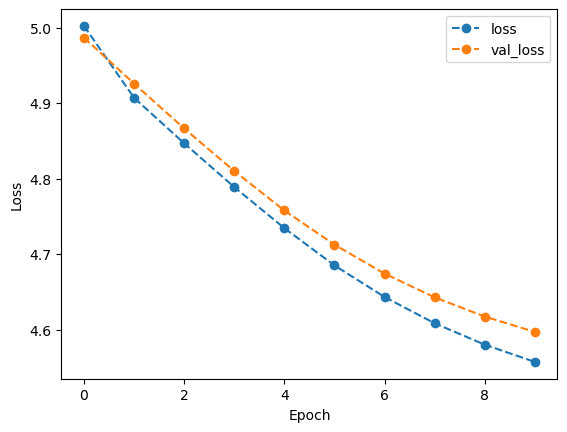

In [7]:
ipvae.visualize_loss()

In [9]:
X_train_z_new = ipvae.compute_latent_vector(X_train_z)
X_val_z_new = ipvae.compute_latent_vector(X_val_z)
X_test_z_new = ipvae.compute_latent_vector(X_test_z)

69/69 [==============================] - 1s 18ms/step


In [10]:
save_latent_vectors(X_train_z_new, None, 'predictions/z_ipvae_gray_scale_train.pkl')
save_latent_vectors(X_val_z_new, None, 'predictions/z_ipvae_gray_scale_val.pkl')
save_latent_vectors(X_test_z_new, None, 'predictions/z_ipvae_gray_scale_test.pkl')